<a href="https://colab.research.google.com/github/billy90834/DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Ignore  the warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import random as rn
from sklearn.model_selection import train_test_split
import glob as gb
#imports 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from scipy.ndimage import zoom

from keras.models import load_model
from keras.applications.mobilenet_v2 import  preprocess_input ,MobileNetV2

In [ ]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("/content/drive/MyDrive/flowers/daisy"):
    try:
        path = "/content/drive/MyDrive/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/dandelion"):
    try:
        path = "/content/drive/MyDrive/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/rose"):
    try:
        path = "/content/drive/MyDrive/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/sunflower"):
    try:
        path = "/content/drive/MyDrive/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("/content/drive/MyDrive/flowers/tulip"):
    try:
        path = "/content/drive/MyDrive/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

In [ ]:
# preprocessing data
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)  # y 值轉成 one-hot encoding,分類數=5

In [ ]:
# test split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [ ]:
x_train.shape,x_test.shape,x_val.shape

((3118, 128, 128, 3), (648, 128, 128, 3), (551, 128, 128, 3))

In [ ]:
# image data augmentation 資料增強=>加強CNN辨識率
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 

datagen.fit(x_train)

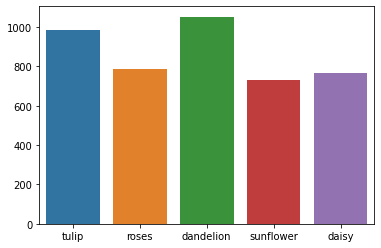

In [ ]:
#data可視化
sns.barplot(x=['tulip','roses','dandelion','sunflower','daisy'] , y=[len(os.listdir('/content/drive/MyDrive/flowers/tulip')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/rose')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/dandelion')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/sunflower')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/daisy'))])

In [ ]:
##影像資料增補
data_augmentation = keras.Sequential([
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomFlip(mode="horizontal"),
    preprocessing.RandomRotation(factor=0.1),
    
])

In [ ]:
epoch = 50 # 定義訓練週期
batch_size = 64 # 定義梯度下降批量

In [ ]:
# 建立的模型
model = keras.Sequential([
    
    
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    #Data preprocessing
    data_augmentation,
    
    layers.Rescaling(1./255),# 轉換色彩 0~255 資料為 0~1

    
    #Base
    #layer 1
    layers.BatchNormalization(),#BN reduce training times,and make very deep net trainable
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'), ##filter為16, Kernel size為3, Padding為(same)
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),# 建立池化層，池化大小=2x2，取最大值
    layers.Dropout(0.2),# Drop掉部分神經元避免overfitting
    #layer 2
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'), 
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.3),
    #layer 3
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'), 
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.3),
    #layer 4
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'), 
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.2),
    #layer 5
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.3), 
    # Head
    layers.BatchNormalization(),
    layers.GlobalMaxPooling2D(),
    layers.Dense(5,activation="softmax") # 使用 softmax activation function，將結果分類
])

In [ ]:
# 輸出模型摘要資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)       

In [ ]:
#reduce the learnng rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001)
#definindo optimizador
optimizer = tf.keras.optimizers.Adam(epsilon=0.01,learning_rate=0.01)

In [ ]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy'],
)

# 進行訓練, 訓練過程會存在 history 變數中
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                        epochs= epoch,validation_data=(x_val,y_val),
                        steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
48/48 [==============================] - 16s 297ms/step - loss: 0.5111 - accuracy: 0.8006 - val_loss: 0.6154 - val_accuracy: 0.7713
Epoch 2/50
48/48 [==============================] - 14s 292ms/step - loss: 0.4821 - accuracy: 0.8219 - val_loss: 0.6532 - val_accuracy: 0.7477
Epoch 3/50
48/48 [==============================] - 14s 288ms/step - loss: 0.5002 - accuracy: 0.8114 - val_loss: 0.6758 - val_accuracy: 0.7695
Epoch 4/50
48/48 [==============================] - 14s 290ms/step - loss: 0.5132 - accuracy: 0.8052 - val_loss: 0.6401 - val_accuracy: 0.7659
Epoch 5/50
48/48 [==============================] - 14s 291ms/step - loss: 0.5243 - accuracy: 0.8035 - val_loss: 0.6746 - val_accuracy: 0.7387
Epoch 6/50
48/48 [==============================] - 14s 296ms/step - loss: 0.4900 - accuracy: 0.8176 - val_loss: 0.5997 - val_accuracy: 0.7913
Epoch 7/50
48/48 [==============================] - 14s 292ms/step - loss: 0.4811 - accuracy: 0.8206 - val_loss: 0.6079 - val_accuracy: 0.7768

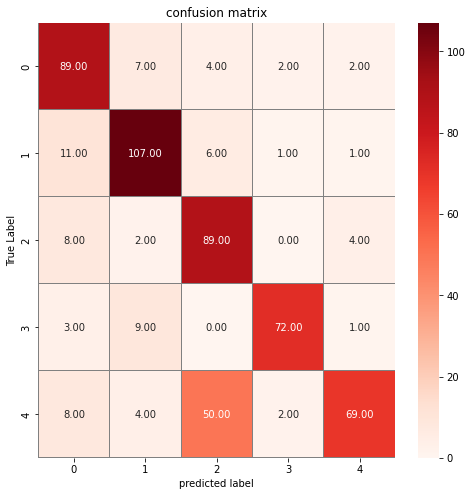

In [ ]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas
print(classification_report(Y_true,Y_pred_classes))

21/21 [==============================] - 0s 20ms/step - loss: 0.7024 - accuracy: 0.7392
Test Accuracy: 73.92%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       104
           1       0.83      0.85      0.84       126
           2       0.60      0.86      0.71       103
           3       0.94      0.85      0.89        85
           4       0.90      0.52      0.66       133

    accuracy                           0.77       551
   macro avg       0.80      0.79      0.78       551
weighted avg       0.80      0.77      0.77       551



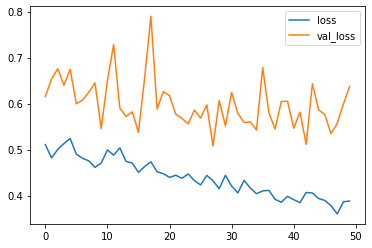

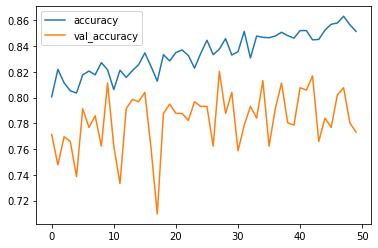

In [ ]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();